Monte Carlo Methods | Finding
zero demo

In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
# Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

## Deterministic recursion

In [4]:
def f(x):
    return np.cos(x)-x

def df(x):
    return -np.sin(x)-1

def T1(x):
    return np.cos(x)

def T2(x):
    return x-f(x)/df(x)

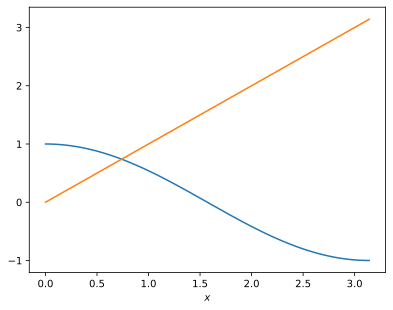

In [5]:
xrange = np.linspace(0, np.pi, 100)
plt.plot(xrange, np.cos(xrange), xrange, xrange)
plt.xlabel(r'$x$')
plt.show()

In [6]:
xstar = fsolve(f, 0.1)[0]
print(xstar)

0.7390851332151573


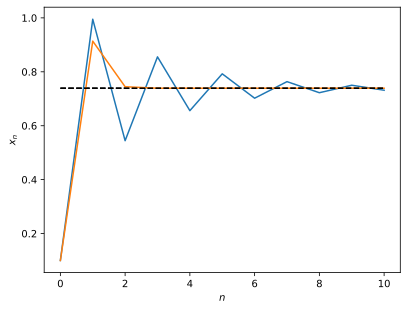

Solution =  0.7390851332151607
Error =  3.3306690738754696e-15


In [7]:
nsteps = 10

# Recursion with T1
x = 0.1
xlist =[x]
for i in range(nsteps):
    x = T1(x)
    xlist.append(x)
    
plt.plot(range(nsteps+1), xlist, range(nsteps+1), (nsteps+1)*[xstar], 'k--')

# Recursion with T2, Newton-Raphson
x = 0.1
xlist =[x]
for i in range(nsteps):
    x = T2(x)
    xlist.append(x)

plt.plot(range(nsteps+1), xlist, range(nsteps+1), (nsteps+1)*[xstar], 'k--')
    
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.show()
print('Solution = ', x)
print('Error = ', np.abs(x-xstar))

## Stochastic recursion

In [9]:
def fnoisy(x, b):
    return f(x)+2*b*np.random.random()-b

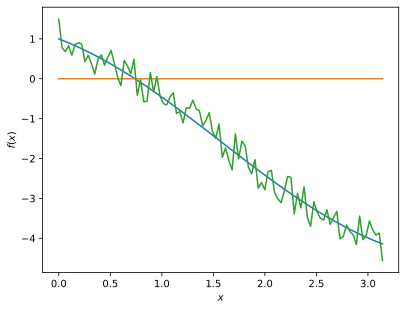

In [10]:
plt.plot(xrange, f(xrange), xrange, len(xrange)*[0], xrange, [fnoisy(x, 0.5) for x in xrange])
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

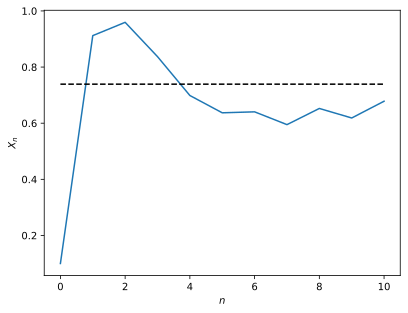

Solution = 0.6783660647011533
Error =  0.06071906851400399


In [30]:
nsteps = 10
x = 0.1
xlist = [x]
b = 0.5

for i in range(nsteps):
    x = x + (1/(i+1)**(1/1))*fnoisy(x, b)
    xlist.append(x)
    
plt.plot(range(nsteps+1), xlist, (nsteps+1)*[xstar], 'k--')
plt.xlabel(r'$n$')
plt.ylabel(r'$X_n$')
plt.show()
print('Solution =', x)
print('Error = ', np.abs(x-xstar))